EDA STEAM GAMES 

In [21]:
"""Cargo las librerias necesarias para hacer este analisis """
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot  as plt


In [37]:
df_steam_games = pd.read_csv('C:/Users/Daniel/Downloads/PI_01_07/Data/archivos_limpios/Steam_Games_Limpio.csv', encoding= 'utf-8')
df_user_reviews = pd.read_csv('C:/Users/Daniel/Downloads/PI_01_07/Data/archivos_limpios/User_Reviews_Limpio.csv', encoding= 'utf-8')
df_users_items = pd.read_csv('C:/Users/Daniel/Downloads/PI_01_07/Data/archivos_limpios/Users_Items_Limpio.csv', encoding= 'utf-8')

In [43]:
df_steam_games

,publisher,genres,item_name,price,early_access,item_id,developer,date
0,Kotoshiro,Action,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018
1,Kotoshiro,Casual,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018
2,Kotoshiro,Indie,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018
3,Kotoshiro,Simulation,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018
4,Kotoshiro,Strategy,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018
...,...,...,...,...,...,...,...,...
55524,Laush Studio,Indie,Russian Roads,1.99,0.0,610660,Laush Dmitriy Sergeevich,2018
55525,Laush Studio,Racing,Russian Roads,1.99,0.0,610660,Laush Dmitriy Sergeevich,2018
55526,Laush Studio,Simulation,Russian Roads,1.99,0.0,610660,Laush Dmitriy Sergeevich,2018
55527,SIXNAILS,Casual,EXIT 2 - Directions,4.99,0.0,658870,"xropi,stev3ns",2017


In [38]:
df_user_reviews

,posted,item_id,recommend,review,user_id
0,2011,1250,True,Simple yet with great replayability. In my opi...,76561197970982479
1,2011,22200,True,It's unique and worth a playthrough.,76561197970982479
2,2011,43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,2014,251610,True,I know what you think when you see this title ...,js41637
4,2013,227300,True,For a simple (it's actually not all that simpl...,js41637
...,...,...,...,...,...
49181,2015,730,True,its FUNNNNNNNN,wayfeng
49182,2015,253980,True,Awesome fantasy game if you don't mind the gra...,76561198251004808
49183,2015,730,True,Prettyy Mad Game,72947282842
49184,2015,730,True,AMAZING GAME 10/10,ApxLGhost


In [53]:
### Quiero ver cuales son los 3 juegos mas recomendados

# Filtrar las revisiones donde se ha realizado una recomendación positiva (True)
recommend = df_user_reviews[df_user_reviews['recommend']]

# Contar el número de recomendaciones por cada 'item_id'
item_recommend = recommend.groupby('item_id')['recommend'].count().reset_index()

# Ordenar los 'item_id' por la cantidad de recomendaciones en orden descendente
item_recommend = item_recommend.sort_values(by='recommend', ascending=False)

# Seleccionar los tres juegos con más recomendaciones
top_3 = item_recommend.head(3)

# Combinar la tabla de los tres juegos más recomendados con la información de nombres de juegos desde df_steam_games
top_3_tier = pd.merge(top_3, df_steam_games[['item_id', 'item_name']], left_on='item_id', right_on='item_id', how='left')

# Imprimir el resultado (los tres juegos más recomendados junto con su cantidad de recomendaciones y nombres)
top_3_tier

,item_id,recommend,item_name
0,440,3359,Team Fortress 2
1,440,3359,Team Fortress 2
2,730,2829,Counter-Strike: Global Offensive
3,4000,1535,Garry's Mod
4,4000,1535,Garry's Mod


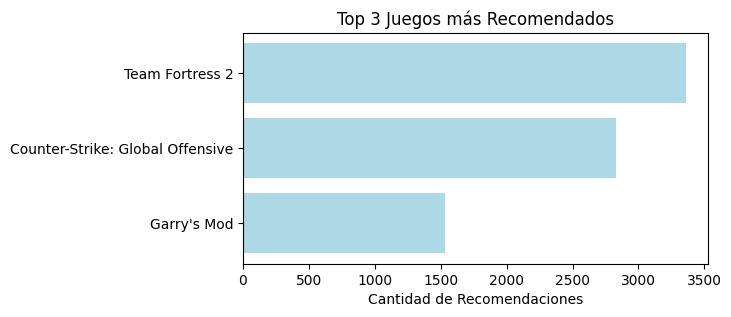

In [54]:
# Gráfico de barras horizontales para los tres juegos más recomendados
plt.figure(figsize=(6, 3))  # Tamaño del gráfico

# Barplot de Matplotlib
plt.barh(top_3_tier['item_name'], top_3_tier['recommend'], color='lightblue')

# Títulos y etiquetas
plt.xlabel('Cantidad de Recomendaciones')
plt.title('Top 3 Juegos más Recomendados')
plt.gca().invert_yaxis()  # Invertir el eje y para que aparezcan los juegos más recomendados en la parte superior

# Mostrar gráfico
plt.show()

In [55]:
# Calcular las horas totales jugadas por juego
top_games = df_users_items.groupby('item_name')['playtime_forever'].sum().reset_index()

# Ordenar los juegos por horas totales jugadas y obtener el top 10
top_10_games = top_games.sort_values(by='playtime_forever', ascending=False).head(10)

# Mostrar el top 10 de juegos con más horas jugadas
top_10_games

,item_name,playtime_forever
2117,Counter-Strike: Global Offensive,775918724
3944,Garry's Mod,441871026
9076,Terraria,152997644
9249,The Elder Scrolls V: Skyrim,134851450
10393,Warframe,122726853
2118,Counter-Strike: Source,111314706
5193,Left 4 Dead 2,101191416
6605,PAYDAY 2,98405781
8139,Sid Meier's Civilization V,81187409
7705,Rust,80110135


In [56]:
juegos_por_año = df_steam_games['date'].value_counts().sort_values(ascending=False)[:15]
print(juegos_por_año)

date
2017    19708
2016    13631
2015     9051
2014     4626
2013     2497
2012     1991
2011      923
2010      635
2009      463
2008      310
2007      240
2006      212
2018      207
2005      120
2003      117
Name: count, dtype: int64


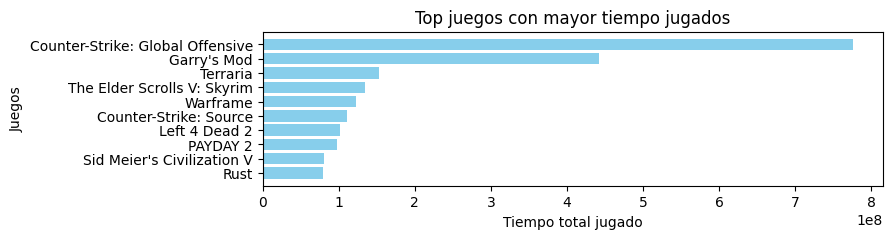

In [57]:

# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(8, 2))

# Grafica un gráfico de barras horizontales
plt.barh(top_10_games['item_name'], top_10_games['playtime_forever'], color='skyblue')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Tiempo total jugado')  # Etiqueta del eje x
plt.ylabel('Juegos')  # Etiqueta del eje y
plt.title('Top juegos con mayor tiempo jugados')  # Título del gráfico

# Invierte el eje y para que los juegos con más tiempo jugado aparezcan arriba
plt.gca().invert_yaxis()

# Muestra el gráfico
plt.show()